<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Assignment 
## Written by Abiola Obembe
### Date: 2021-04-04
### Course: ML masters with deployment and deep learning
### Objective: predict how many points NBA players scored in the 2013-2014    season using XGBoost
-----------------------------------------------------------------------------
### ----------  Assignment starts here -------------------------------------------------

## Dataset

Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:



In [1]:
# Loading Data and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


# Import other libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)


Libraries installed successfully!


In [2]:
# Load dataset 

data = pd.read_csv('nba_2013.csv')
data.head()



,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
# Let's check the  dataframe infor
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
# priniting the details about the dataset

print("\nEDA on Training Set\n")
print("#"*30)

print("\n\nNumber of Features/Columns : ", len(data.columns))
print("\nNumber of Rows : ",data.shape[0])


print("\n Contains NaN/Empty cells : ", data.isnull().values.any())


missing_values = data.isnull().sum().sum()
print("\n Total missing values in train dataframe is: \n", str(missing_values))

total_data = np.product(data.shape)

print("\n Perecentage of missing values in train dataframe is: \n", str(100*(missing_values/total_data))+'%')


EDA on Training Set

##############################


Number of Features/Columns :  31

Number of Rows :  481

 Contains NaN/Empty cells :  True

 Total missing values in train dataframe is: 
 94

 Perecentage of missing values in train dataframe is: 
 0.6304070820199853%


In [5]:
# Print missing values by column
data.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [6]:
# Check for missing values in taget field
data.pts.isna().sum()

0

In [7]:
# Bascic statistics
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [8]:
# Examine season_end column
data.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

In [9]:
# Examine season_end column
data.season.value_counts()

2013-2014    481
Name: season, dtype: int64

This column has no useful information since it stores the same value all through and thus we can drop this column

In [10]:
# Drop the season_end column
data.drop(['season_end','season','player'], axis = 1, inplace= True)

data.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328


In [11]:
# Define continous and categorical features as one new dataframe
# Extract numerical columns from train dataframe
numerical_cols = [cname for cname in data.columns if
                data[cname].dtype in ['int64', 'float64']]


categorical_features = [cname for cname in data.columns if
                    data[cname].dtype == "object"]

categorical_cols = categorical_features.copy()
categorical_cols.append('pts')



print(numerical_cols)
print('*'*100)
print(categorical_cols)



['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
****************************************************************************************************
['pos', 'bref_team_id', 'pts']


In [12]:
# Establish numerical features from numerical columns

numerical_features = numerical_cols[:-1]

print(numerical_features)
print('*'*100)
print(categorical_features)

['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
****************************************************************************************************
['pos', 'bref_team_id']


In [13]:
# Address missing values in numerical dataframe
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# Addressing categorical data
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0]) 


data.isna().sum()

pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
dtype: int64

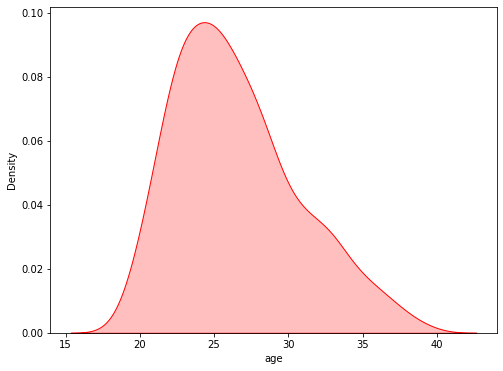

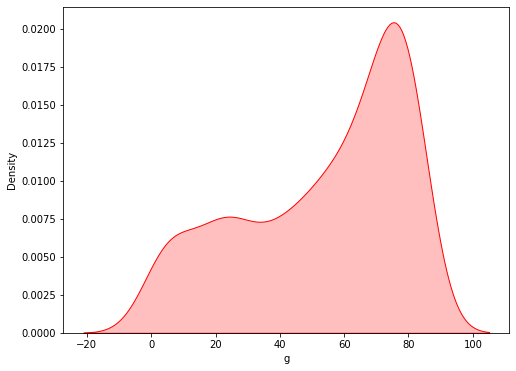

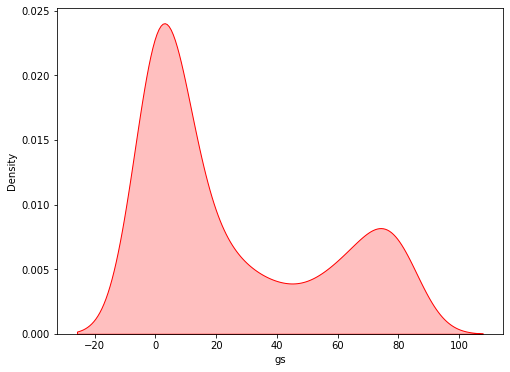

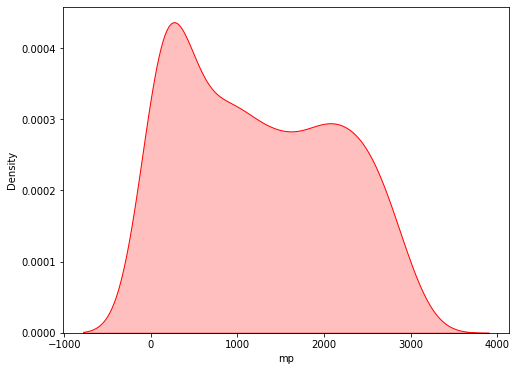

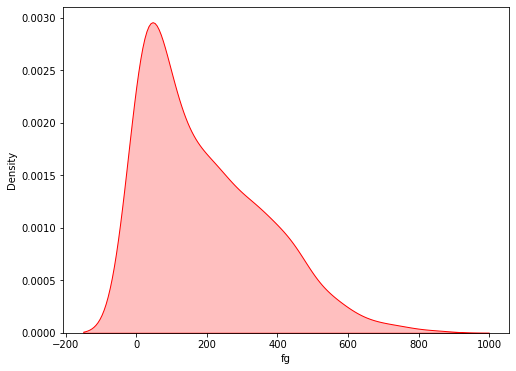

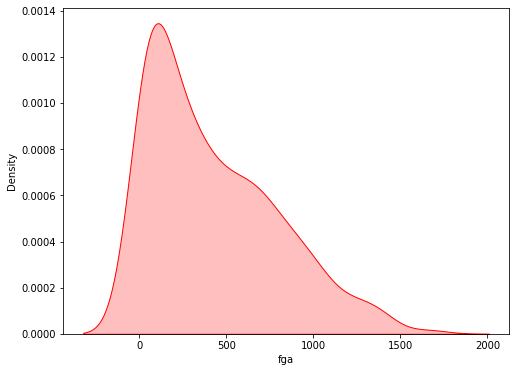

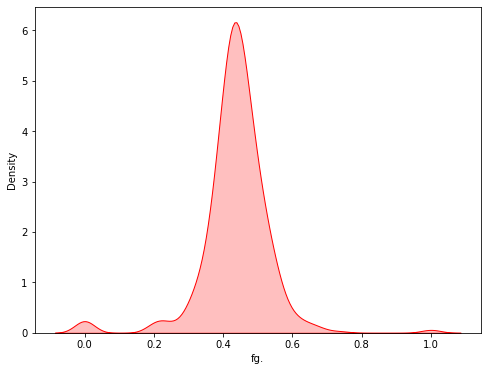

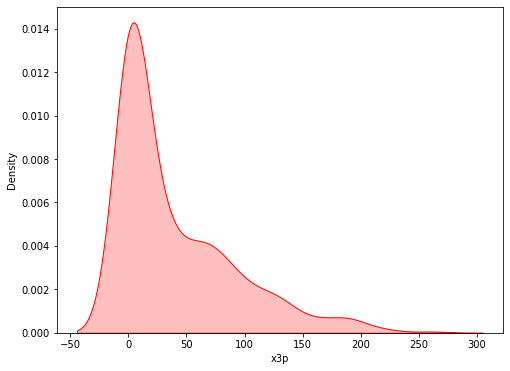

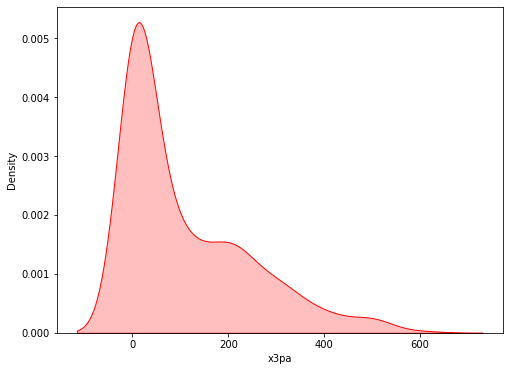

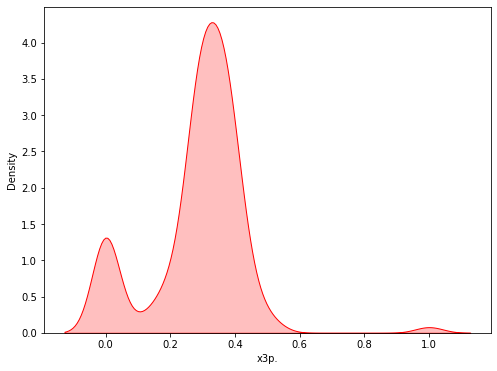

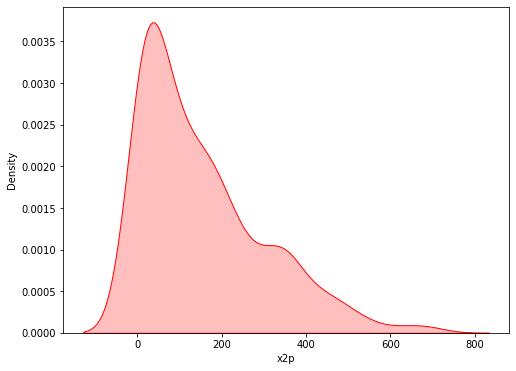

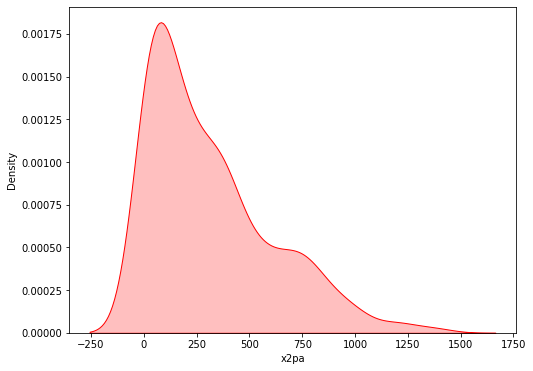

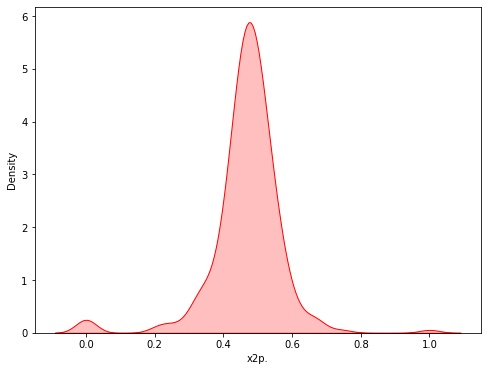

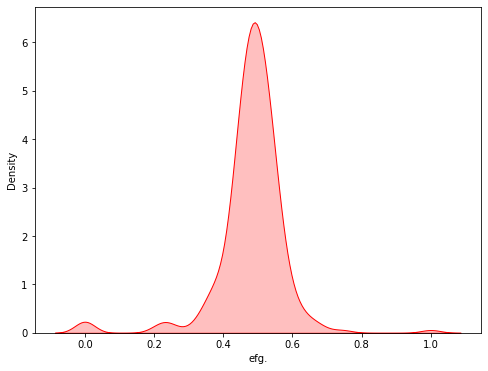

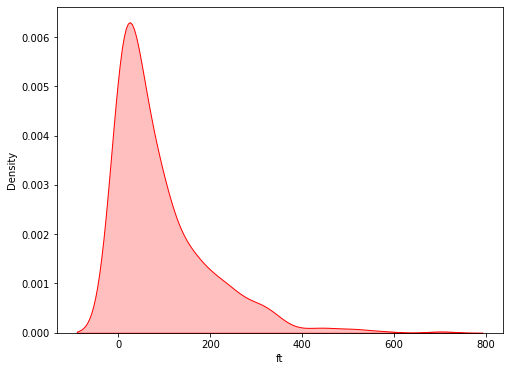

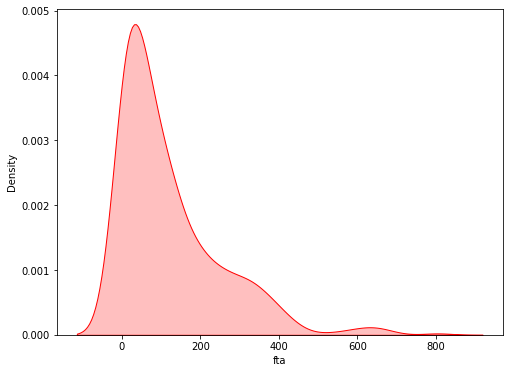

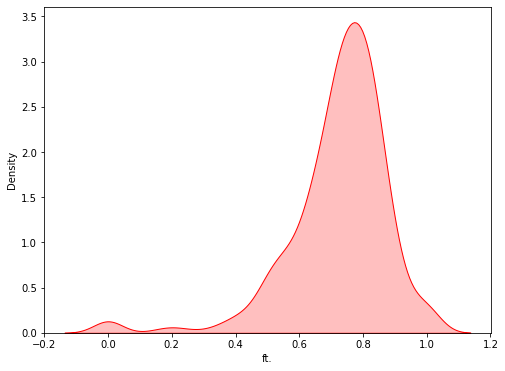

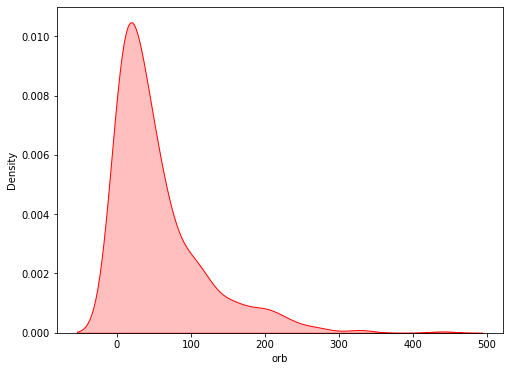

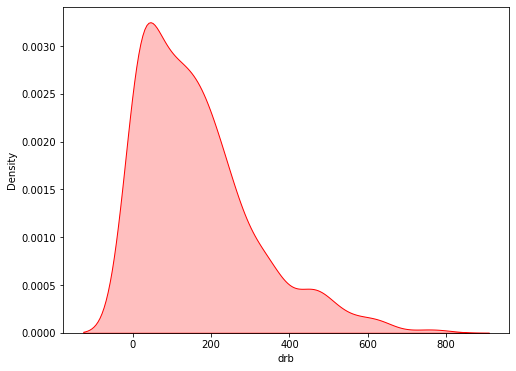

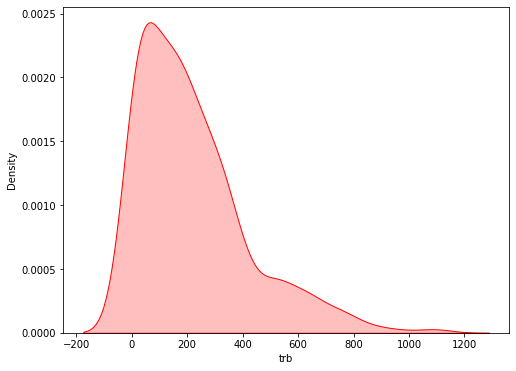

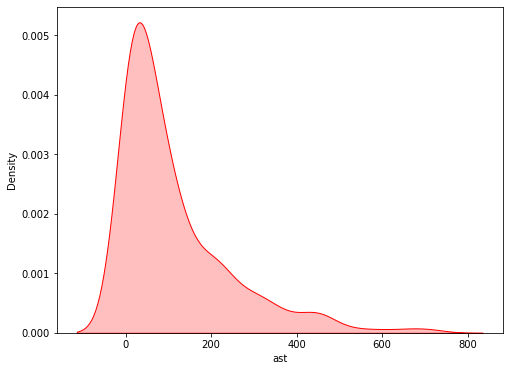

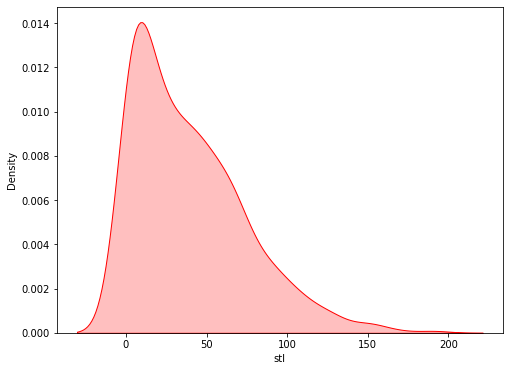

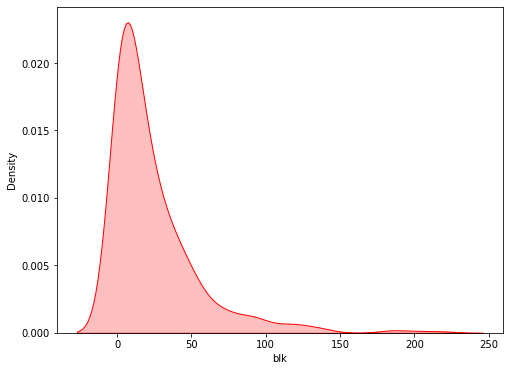

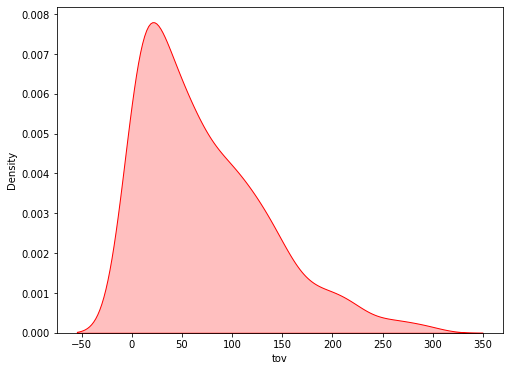

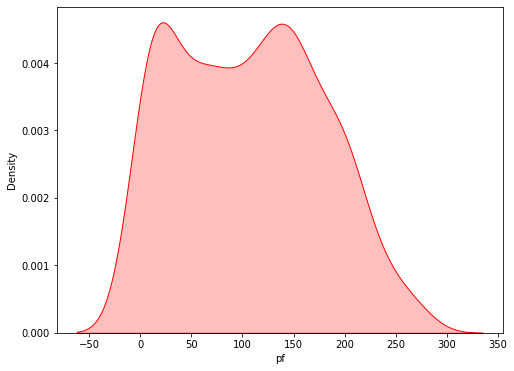

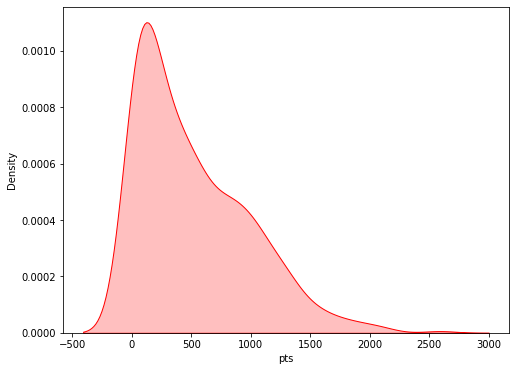

In [14]:
# KDE Plot
for col in numerical_cols:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(data[col], shade=True, color="r")
    plt.show()

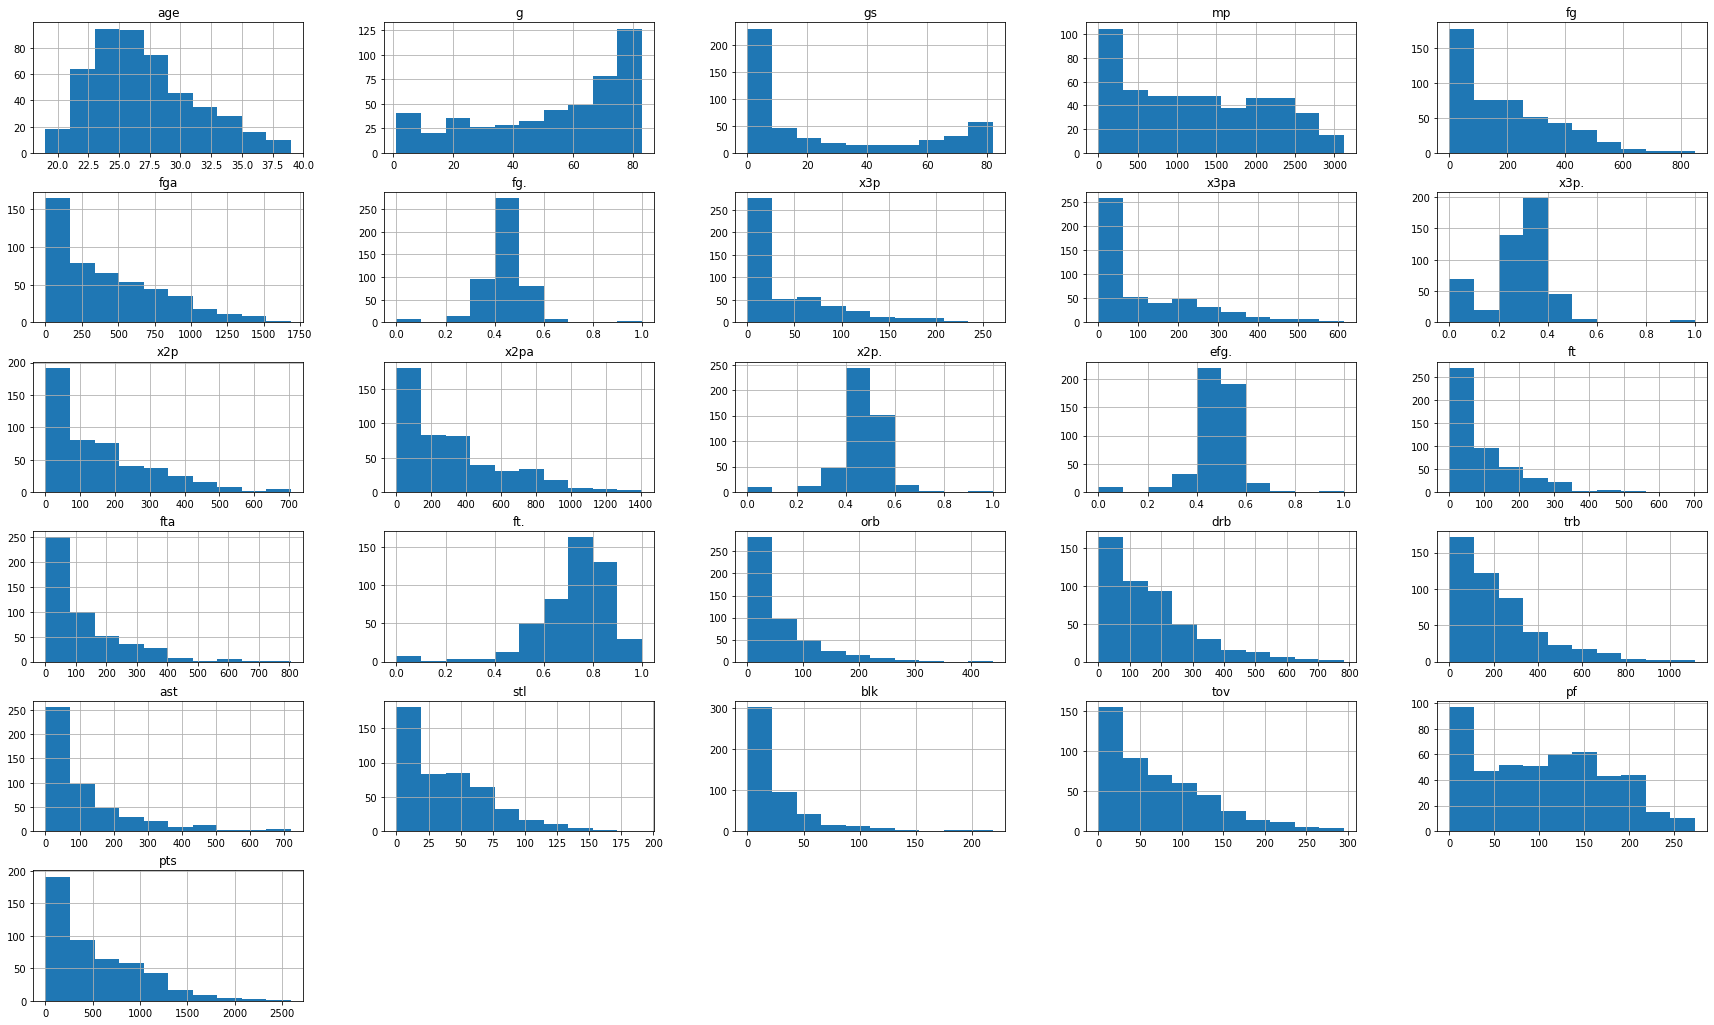

In [15]:

# Visualize histogram of dataset
data.hist(figsize= (30,18), bins= 10)
plt.show()

In [16]:
# Let us see the cardanilatity of each column for the categorical columns in train and test set
# Unique value sin each columns
for cols in categorical_features:
    print("Unique values in", cols,  "column in dataset:", data[cols].nunique())
    print("*"*80)

Unique values in pos column in dataset: 7
********************************************************************************
Unique values in bref_team_id column in dataset: 31
********************************************************************************


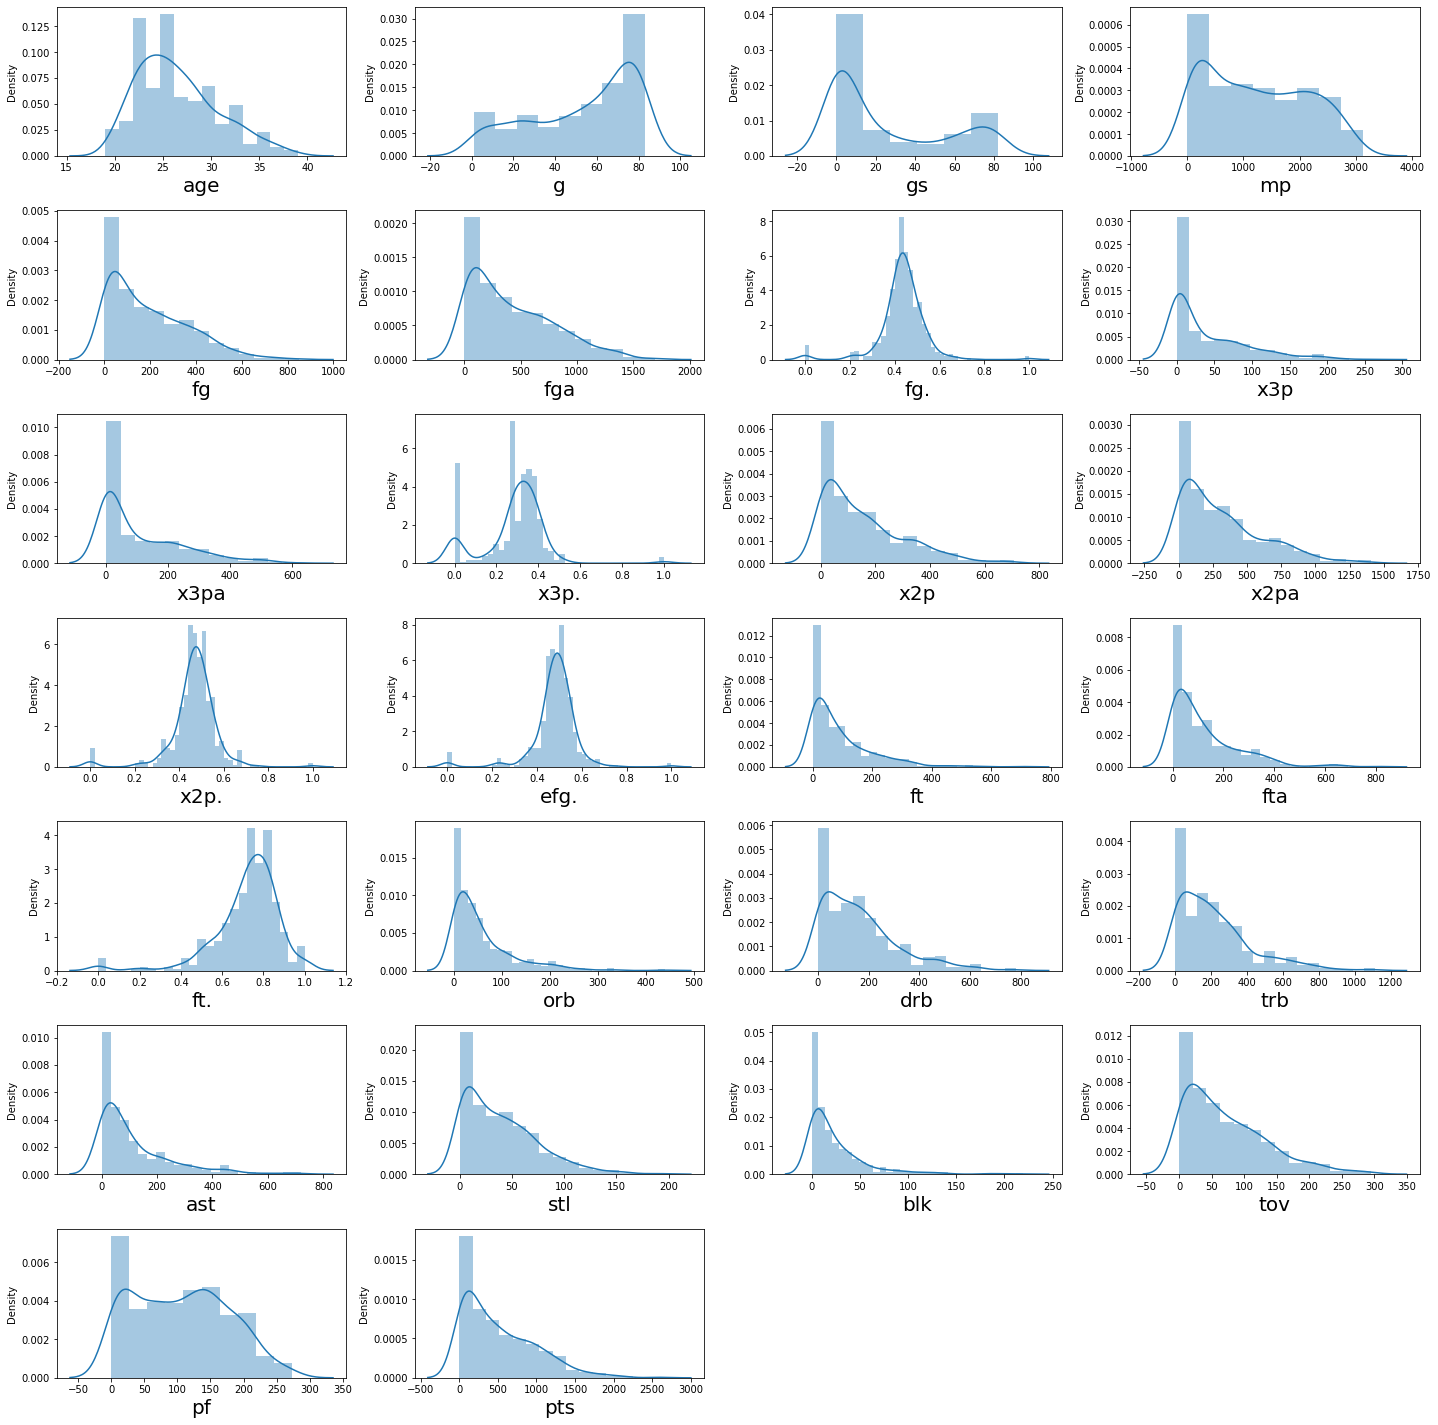

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_cols:
    if plotnumber<=36 :
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
# Let's perform basic analysis of data
data_test = data[categorical_cols]

data_test.head()

,pos,bref_team_id,pts
0,SF,TOT,171
1,C,OKC,265
2,PF,TOT,362
3,SG,ORL,1330
4,C,NOP,328


In [19]:
# Group points scored by position of player
data_test.groupby('pos', as_index=False,sort= True).mean().sort_values(by='pts', ascending=False, inplace=False).head(5)

,pos,pts
4,PG,611.141176
3,PF,571.031250
6,SG,500.357798
5,SF,493.989899
0,C,425.066667


In [20]:
# Group points scored by bre_team_id
data_test.groupby('bref_team_id', as_index=False).mean().sort_values(by='pts', ascending=False, inplace=False).head(5)

,bref_team_id,pts
9,GSW,655.833333
27,TOR,642.100000
7,DEN,639.833333
11,IND,612.083333
17,MIN,609.142857


In [21]:
# Group points scored by bref_team_id and position
data_test.groupby(['pos','bref_team_id'], as_index=False).mean().sort_values(by='pts', ascending=False, inplace=False).head(5)

,pos,bref_team_id,pts
73,PG,GSW,1873.0
94,PG,WAS,1583.0
78,PG,MEM,1256.0
128,SG,BRK,1245.0
48,PF,MIA,1131.0


In [22]:
# Calculate the skewness and kurtosis values
for col in numerical_cols:
    print(col)
    print("skewness:", data[col].skew())
    print("kurtosis:", data[col].kurtosis())
    print('-'*35)

age
skewness: 0.6654038420733254
kurtosis: -0.12945080094456252
-----------------------------------
g
skewness: -0.6253391673187659
kurtosis: -0.9311504338228573
-----------------------------------
gs
skewness: 0.8000092890081096
kurtosis: -0.992759612008526
-----------------------------------
mp
skewness: 0.25039553810415427
kurtosis: -1.2222149947416392
-----------------------------------
fg
skewness: 0.9210521753826488
kurtosis: 0.27574432246847413
-----------------------------------
fga
skewness: 0.854159201234759
kurtosis: -0.00887835553687788
-----------------------------------
fg.
skewness: -0.6007112951003496
kurtosis: 9.458185368488344
-----------------------------------
x3p
skewness: 1.4711846331736562
kurtosis: 1.7310414319419953
-----------------------------------
x3pa
skewness: 1.2741377736392487
kurtosis: 0.9289844389346786
-----------------------------------
x3p.
skewness: 0.08821275646097997
kurtosis: 4.089394038781492
-----------------------------------
x2p
skewness: 1

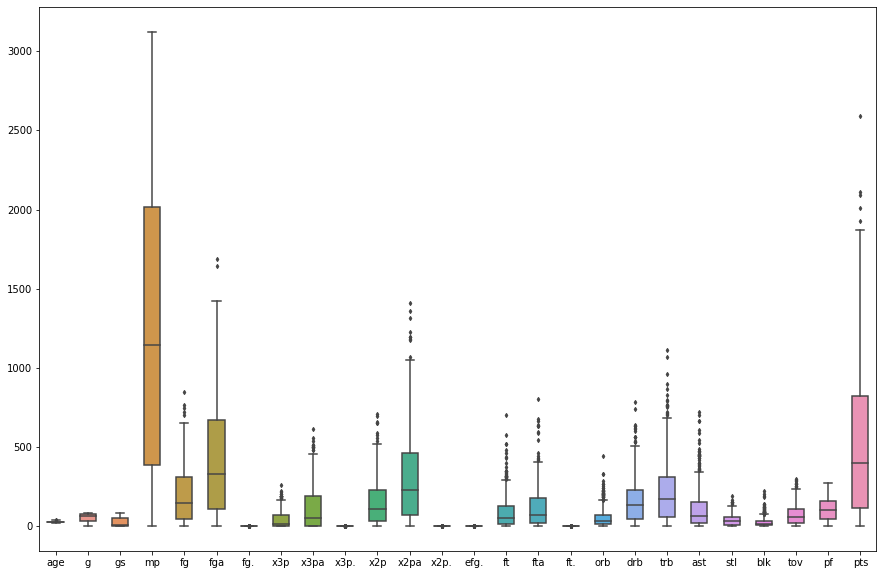

In [23]:
# Print boxplot to portray outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [24]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(data[numerical_cols]))
zscore

array([[0.83677633, 0.3852869 , 0.86310432, ..., 0.66834514, 0.22675114,
        0.73538599],
       [1.55210112, 1.09685132, 0.1880585 , ..., 0.0137745 , 1.36535809,
        0.53535746],
       [0.11699006, 0.01002666, 0.45807683, ..., 0.5246589 , 0.02995488,
        0.32894504],
       ...,
       [0.35989314, 1.01778861, 1.76957436, ..., 1.48694846, 1.50592685,
        1.91605599],
       [1.31365952, 1.13638268, 0.76184744, ..., 0.24166771, 0.90148119,
        0.05656577],
       [0.59833473, 0.6620064 , 0.5593337 , ..., 0.18939101, 0.43760428,
        0.25021041]])

In [25]:
## For simplicity remove all data with outliers
data_clean = data.copy()
data_clean = data[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", data.shape)
print("The shape of the clean dataframe is :", data_clean.shape)

deleted_entries = data.shape[0] - data_clean.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (481, 28)
The shape of the clean dataframe is : (419, 28)
Entries deleted in the dataframe are : 62


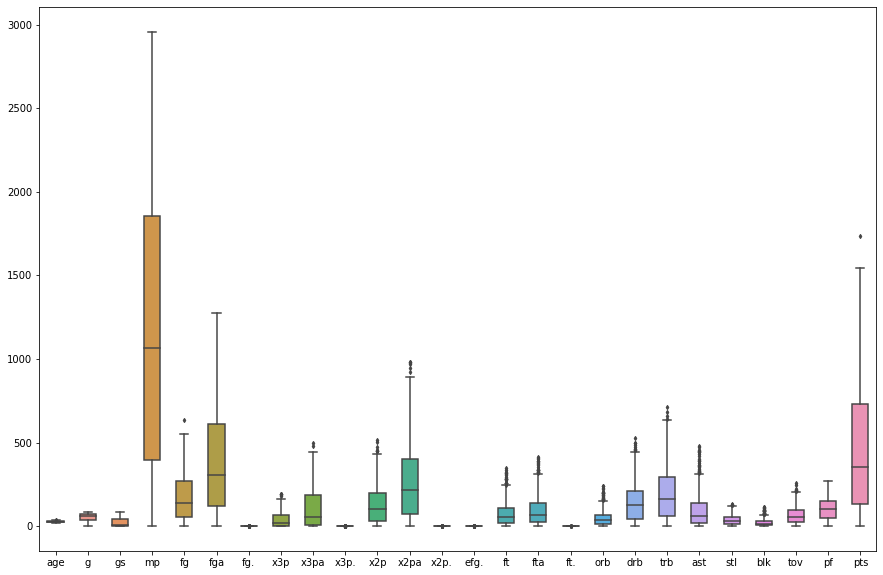

In [26]:
# Examine cleaned dataframe
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_clean, width= 0.5,ax=ax,  fliersize=3)

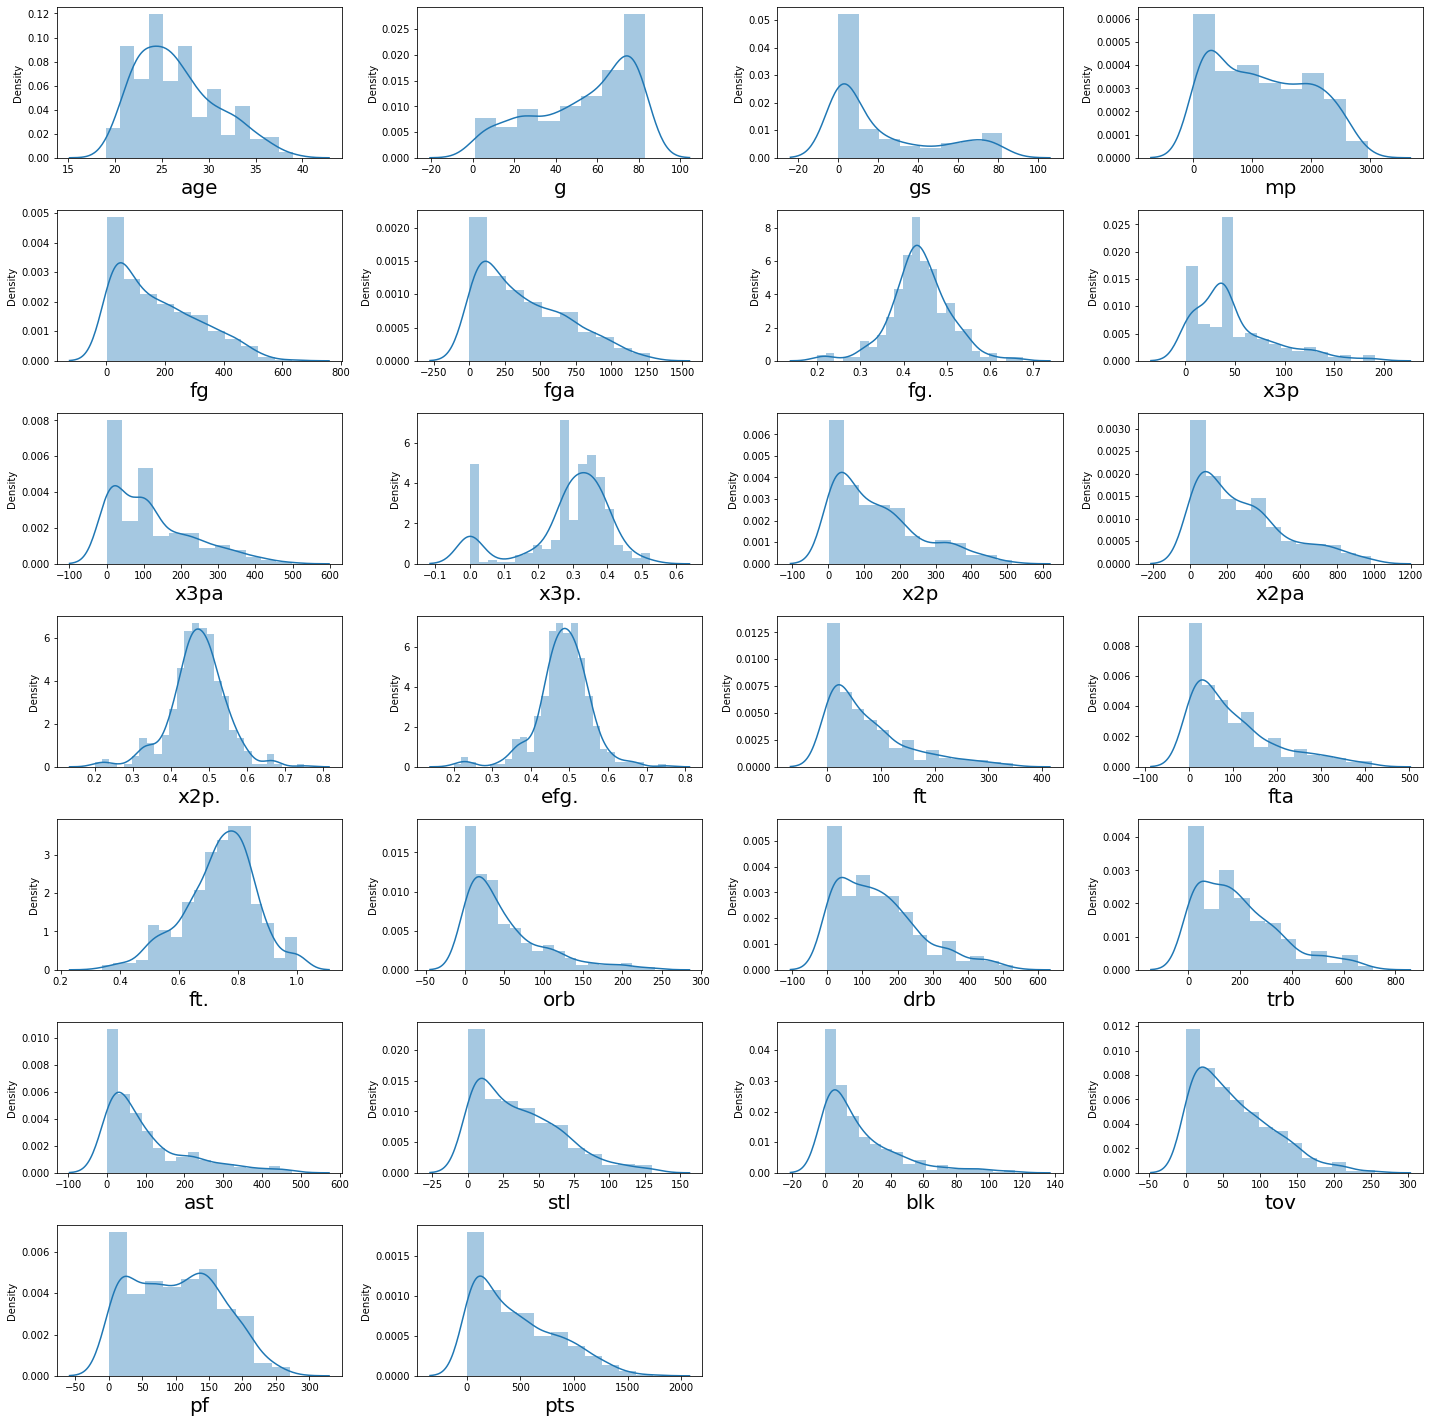

In [42]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_cols:
    if plotnumber<=36 :
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [49]:
for cols in numerical_features:
    data_clean[cols] = data_clean[cols].replace(0,data_clean[cols].mean())


data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,22.00716,847,66.0,141.0,0.468,4.000000,15.000000,0.266667,62.0,126.0,0.492063,0.482,35.0,53.0,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171
1,C,20,OKC,81,20.00000,1197,93.0,185.0,0.503,37.849642,105.832936,0.285111,93.0,185.0,0.502703,0.503,79.0,136.0,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265
2,PF,27,TOT,53,12.00000,961,143.0,275.0,0.520,37.849642,105.832936,0.285111,143.0,275.0,0.520000,0.520,76.0,119.0,0.639,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362
3,SG,28,ORL,73,73.00000,2552,464.0,1011.0,0.459,128.000000,300.000000,0.426667,336.0,711.0,0.472574,0.522,274.0,336.0,0.815,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330
4,C,25,NOP,56,30.00000,951,136.0,249.0,0.546,37.849642,1.000000,0.283589,136.0,248.0,0.548387,0.546,56.0,67.0,0.836,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328


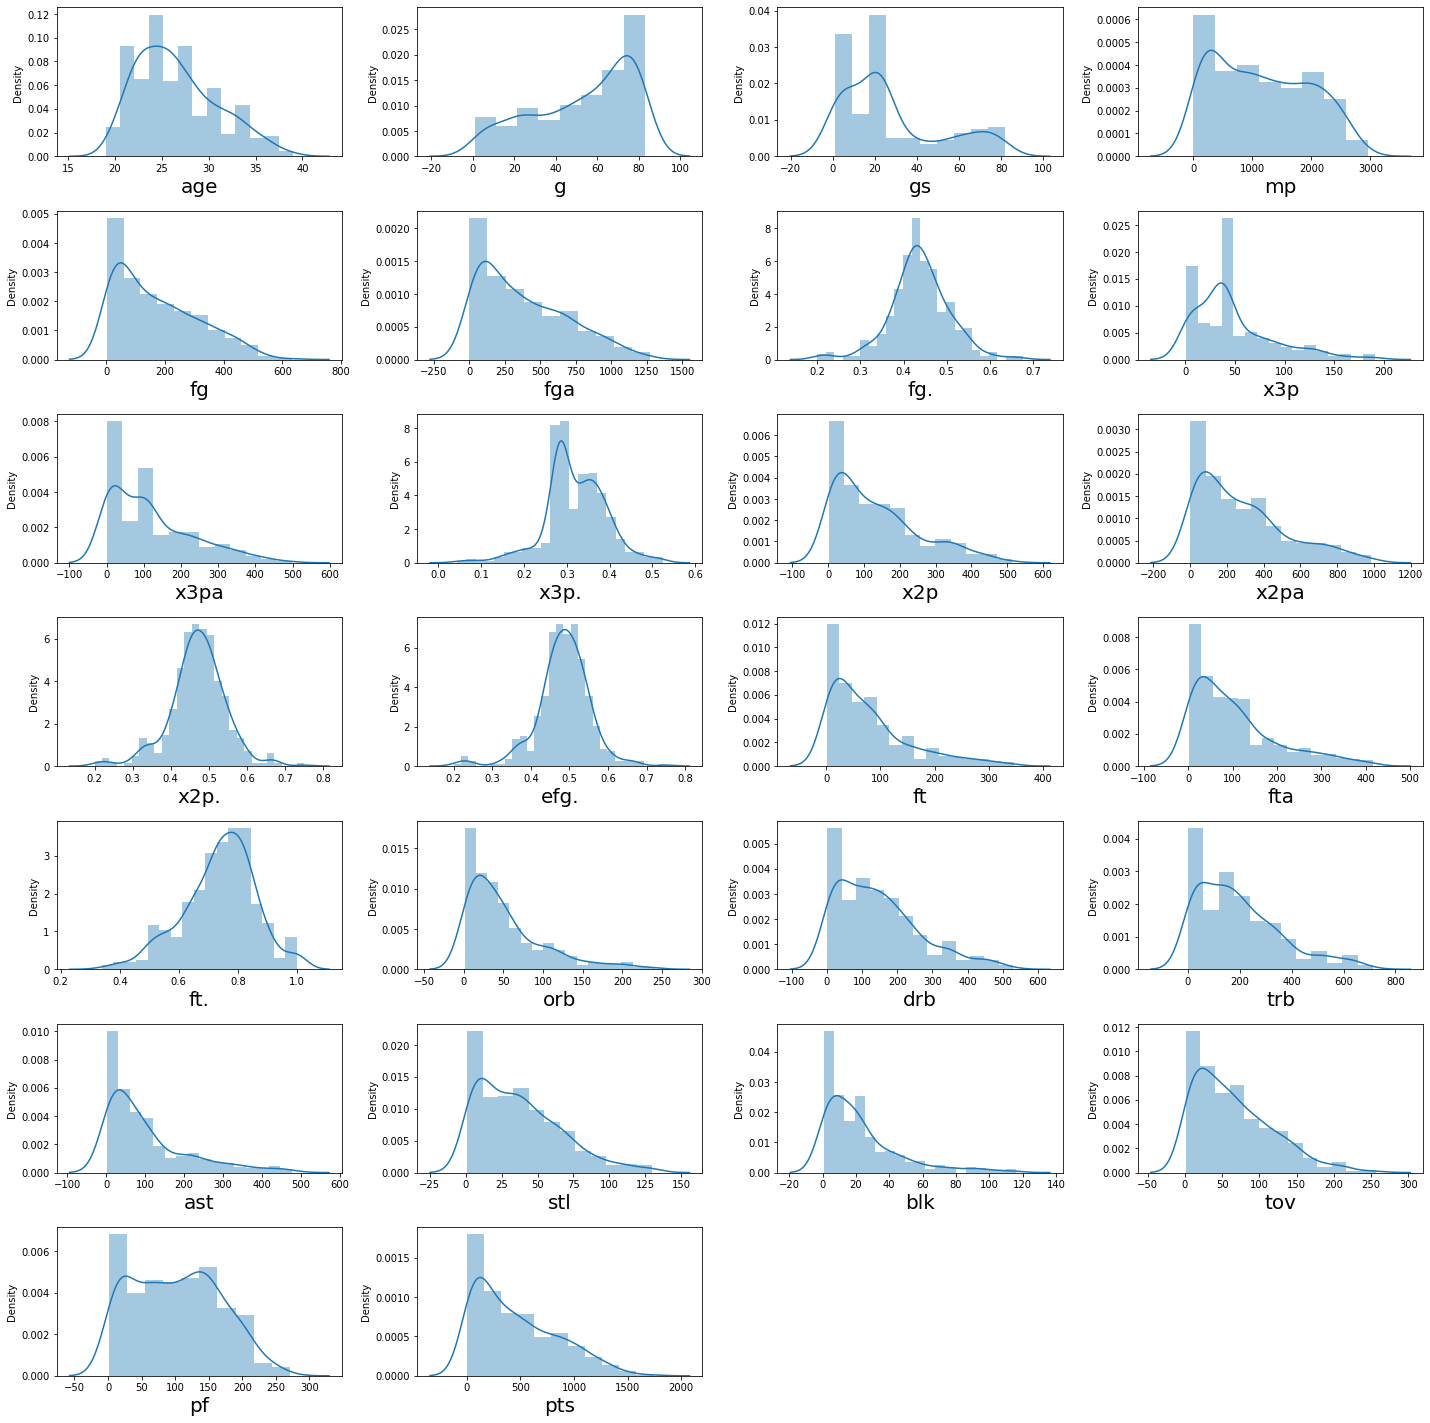

In [50]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_cols:
    if plotnumber<=36 :
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [35]:
# replacing zero values with the mean of the column

for columns in numerical_features:
   data[col]
data_clean['fg'] = data_clean['fg'].replace(0,data_clean['fg'].mean())
data_clean['fga'] = data_clean['fga'].replace(0,data_clean['fga'].mean())
data_clean['x3p'] = data_clean['x3p'].replace(0,data_clean['x3p'].mean())
data_clean['x3pa'] = data_clean['x3pa'].replace(0,data_clean['x3pa'].mean())
data_clean['x2p'] = data_clean['x2p'].replace(0,data_clean['x2p'].mean())
data_clean['x2pa'] = data_clean['x2pa'].replace(0,data_clean['x2pa'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [51]:
# Create numerical dataframe 
df_num = data_clean[numerical_cols]

df_num.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,22.00716,847,66.0,141.0,0.468,4.000000,15.000000,0.266667,62.0,126.0,0.492063,0.482,35.0,53.0,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171
1,20,81,20.00000,1197,93.0,185.0,0.503,37.849642,105.832936,0.285111,93.0,185.0,0.502703,0.503,79.0,136.0,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265
2,27,53,12.00000,961,143.0,275.0,0.520,37.849642,105.832936,0.285111,143.0,275.0,0.520000,0.520,76.0,119.0,0.639,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362
3,28,73,73.00000,2552,464.0,1011.0,0.459,128.000000,300.000000,0.426667,336.0,711.0,0.472574,0.522,274.0,336.0,0.815,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330
4,25,56,30.00000,951,136.0,249.0,0.546,37.849642,1.000000,0.283589,136.0,248.0,0.548387,0.546,56.0,67.0,0.836,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328


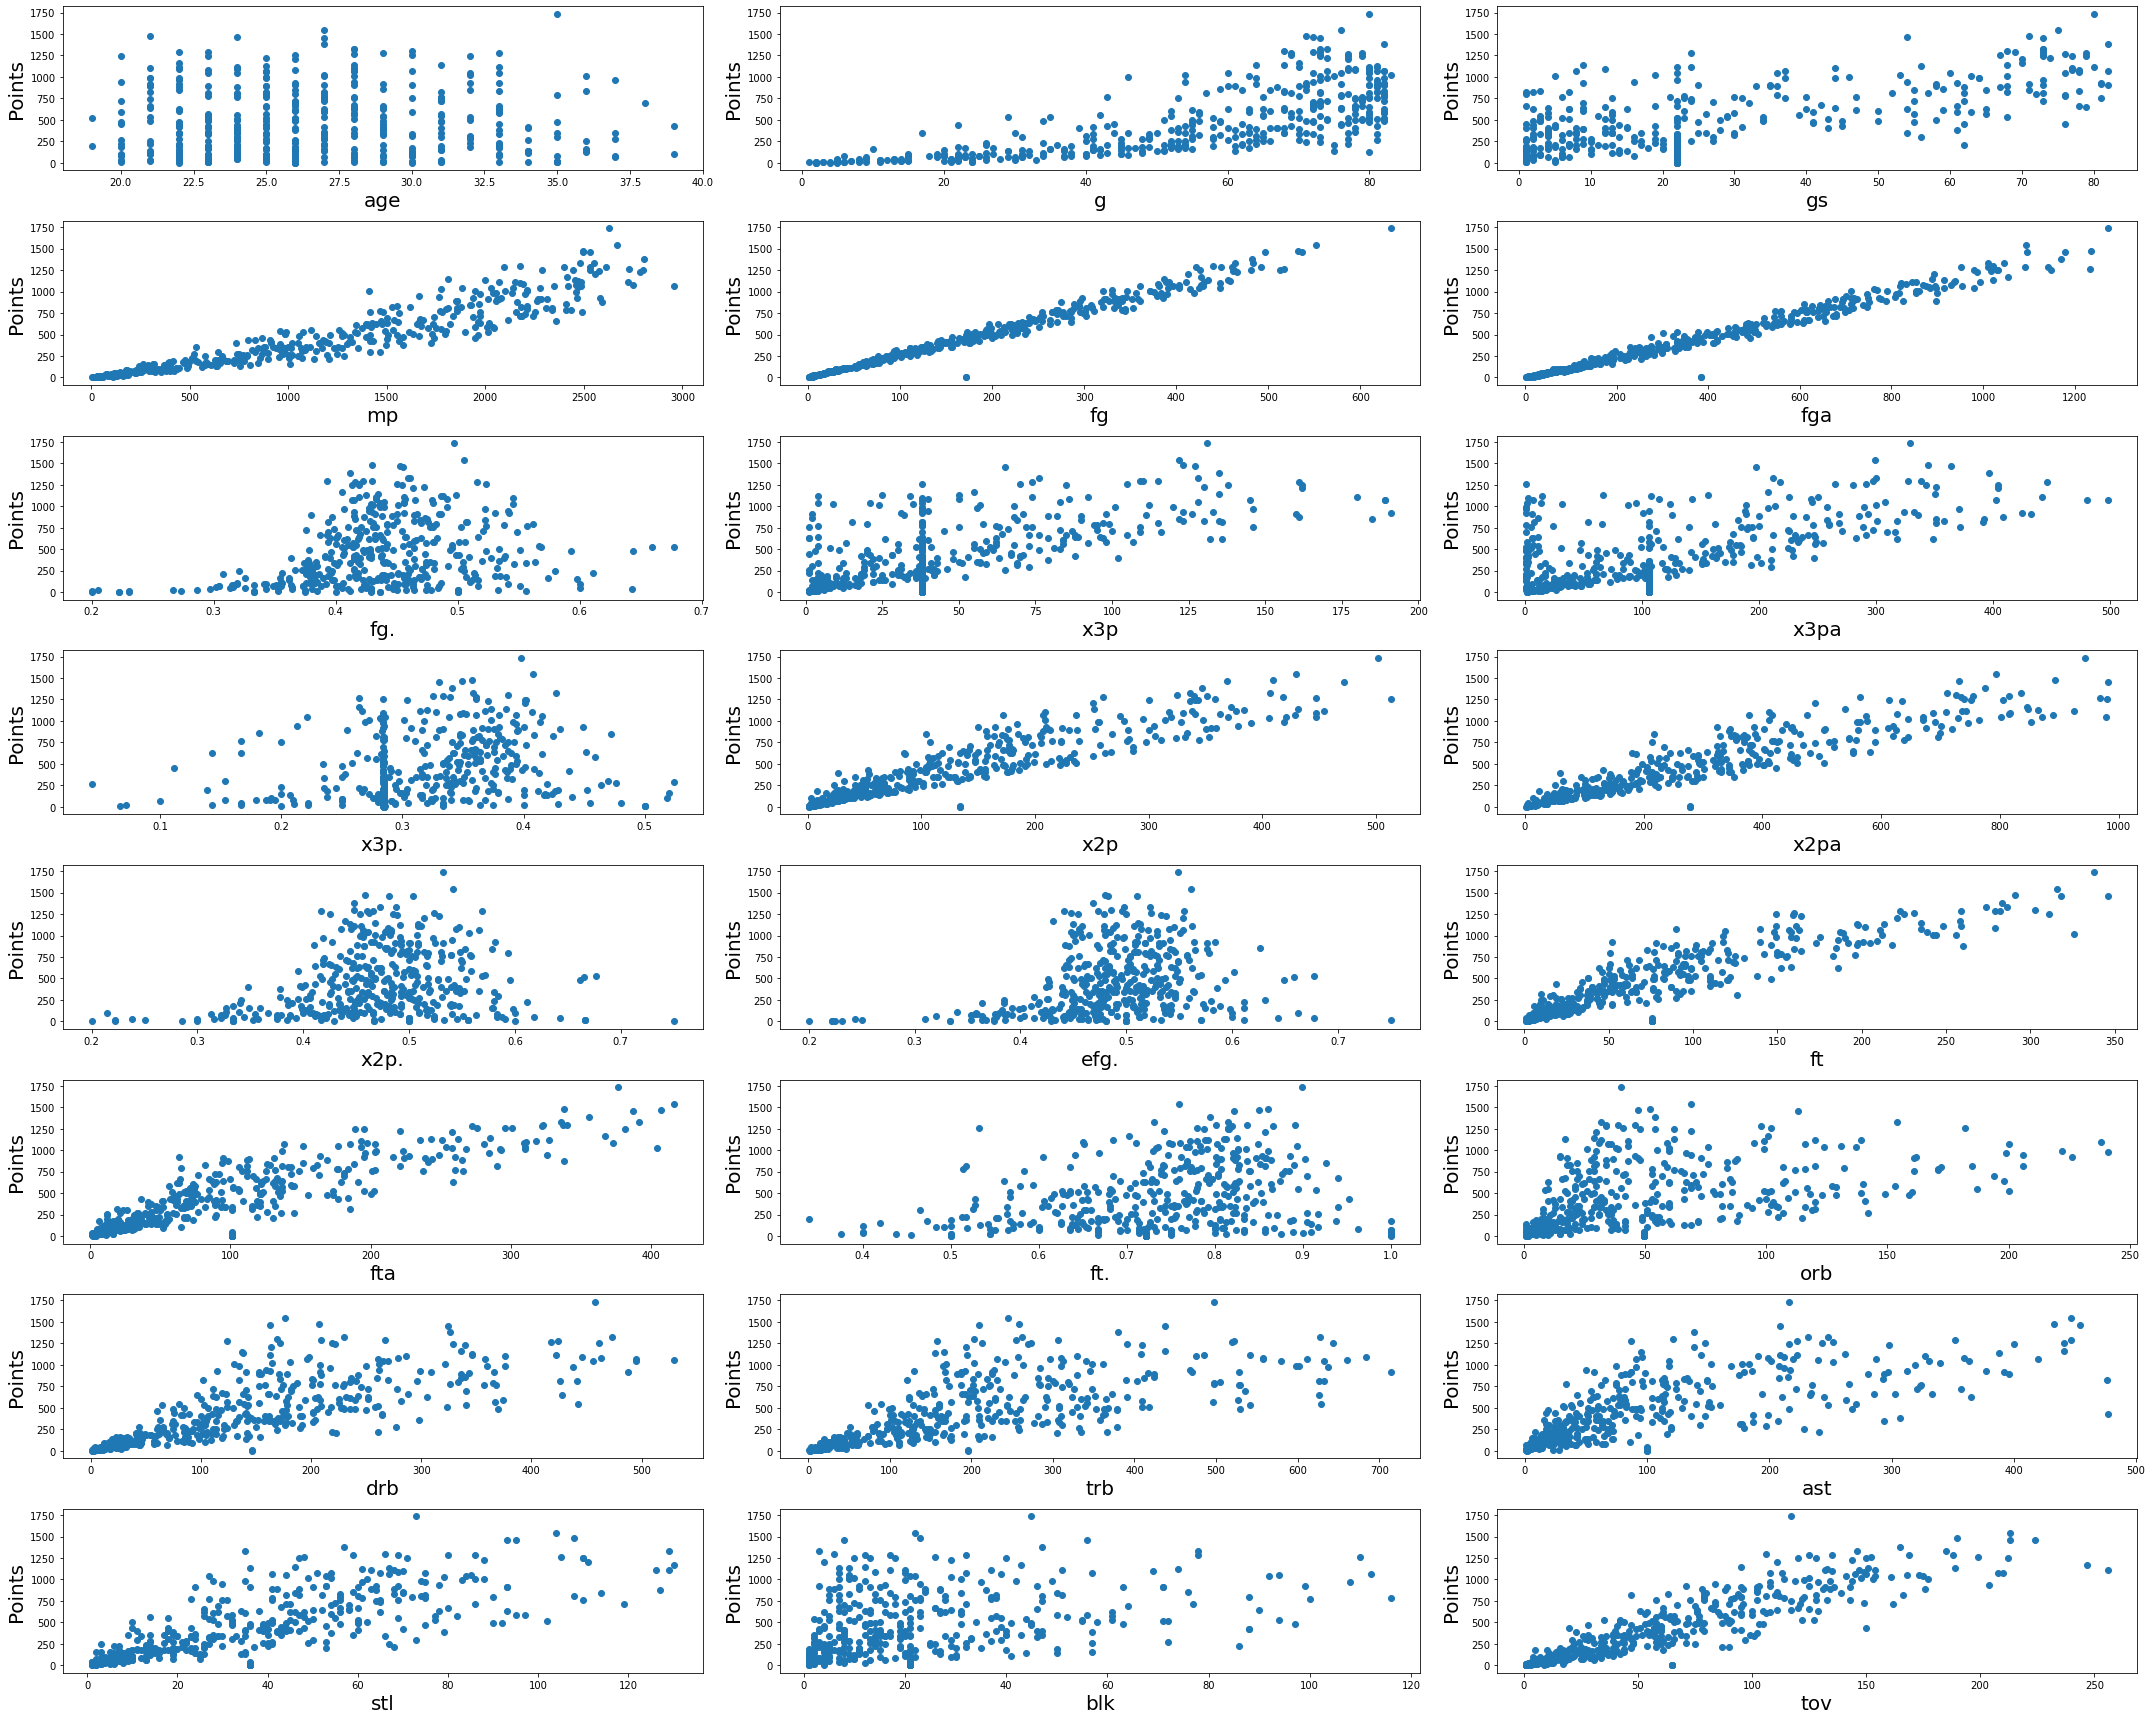

In [52]:
# create X and y
X = df_num.iloc[:, :-1]
y = df_num.iloc[:,-1]

plt.figure(figsize=(30,24), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=24 :
        ax = plt.subplot(8,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Points',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [53]:
# Let's move ahead and check for multicollinearity.
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

,VIF,Features
0,1.151390,age
1,7.749687,g
2,2.974479,gs
3,35.267584,mp
4,951.359263,fg
5,771.728783,fga
6,12.391357,fg.
7,15.896404,x3p
8,19.182963,x3pa
9,3.349589,x3p.


In [54]:
# We drop all columns with VIF greater than 5 due to colineraity 
to_drop_cols = vif[vif['VIF']> 5].Features.tolist()
# Drop columns
X.drop(to_drop_cols, axis= 1, inplace = True)
select_num_columns = X.columns.tolist()
X.head()

,age,gs,x3p.,x2p.,ft.,stl,blk
0,23,22.00716,0.266667,0.492063,0.660,23.0,26.0
1,20,20.00000,0.285111,0.502703,0.581,40.0,57.0
2,27,12.00000,0.285111,0.520000,0.639,24.0,36.0
3,28,73.00000,0.426667,0.472574,0.815,35.0,3.0
4,25,30.00000,0.283589,0.548387,0.836,23.0,46.0
